In [1]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

d:\MCA\5_Trimester\Neural Network and Deep Learning\tfgpu311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Set Dataset Paths**

In [2]:
path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: C:\Users\ajing\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2


['seg_pred', 'seg_test', 'seg_train']

In [3]:
train_dir = os.path.join(path, "seg_train", "seg_train")
test_dir = os.path.join(path, "seg_test", "seg_test")

### **Data Visualization**

Found 14034 images belonging to 6 classes.


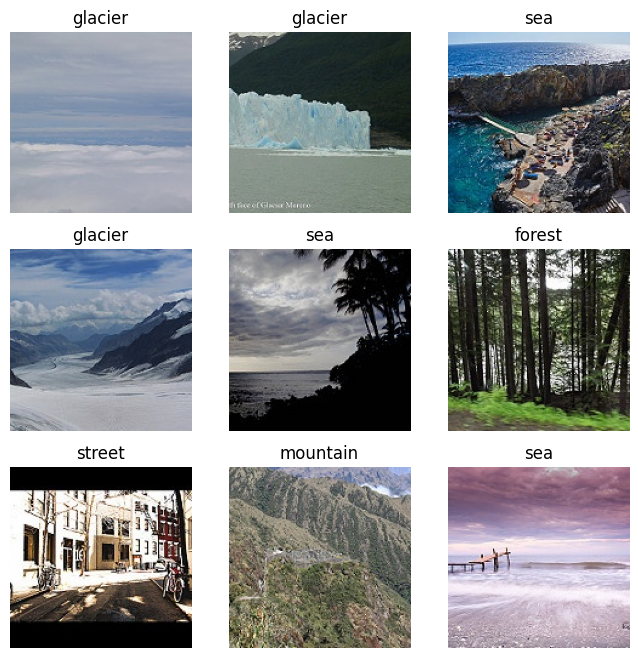

In [4]:
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='categorical')

# Visualize few samples
plt.figure(figsize=(8,8))
for i in range(9):
    img, label = next(train_data)
    plt.subplot(3,3,i+1)
    plt.imshow(img[0])
    plt.title(list(train_data.class_indices.keys())[np.argmax(label[0])])
    plt.axis("off")
plt.show()

### **Data Augmentation**

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


### **Build CNN Model**

In [6]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(512, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])


d:\MCA\5_Trimester\Neural Network and Deep Learning\tfgpu311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Compile the Model**

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,979,142 (30.44 MB)

 Trainable params: 7,977,222 (30.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [8]:
print(tf.config.list_physical_devices('GPU'))

[]


### **Train the Model**

In [9]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=25
)

Epoch 1/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 806s 2s/step - accuracy: 0.4500 - loss: 2.5623 - val_accuracy: 0.4190 - val_loss: 1.5815
Epoch 2/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 734s 2s/step - accuracy: 0.5587 - loss: 1.1391 - val_accuracy: 0.5920 - val_loss: 1.0504
Epoch 3/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 770s 2s/step - accuracy: 0.6196 - loss: 1.0287 - val_accuracy: 0.5610 - val_loss: 1.1298
Epoch 4/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 770s 2s/step - accuracy: 0.6413 - loss: 0.9852 - val_accuracy: 0.7040 - val_loss: 0.7881
Epoch 5/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.6756 - loss: 0.9039 - val_accuracy: 0.4460 - val_loss: 2.4020
Epoch 6/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 772s 2s/step - accuracy: 0.6903 - loss: 0.8601 - val_accuracy: 0.6873 - val_loss: 0.8231
Epoch 7/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 778s 2s/step - accuracy: 0.7201 - loss: 0.7756 - val_accuracy: 0.7437 - val_loss: 0.7418
Epoch 8/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 779s 2s/step - accuracy: 0.7363 - loss: 0.7515 - val_accu

### **Evaluate on Test Data**

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 255ms/step - accuracy: 0.7873 - loss: 0.7069
Test Accuracy: 78.73%


### **Plot Accuracy and Loss Curves**

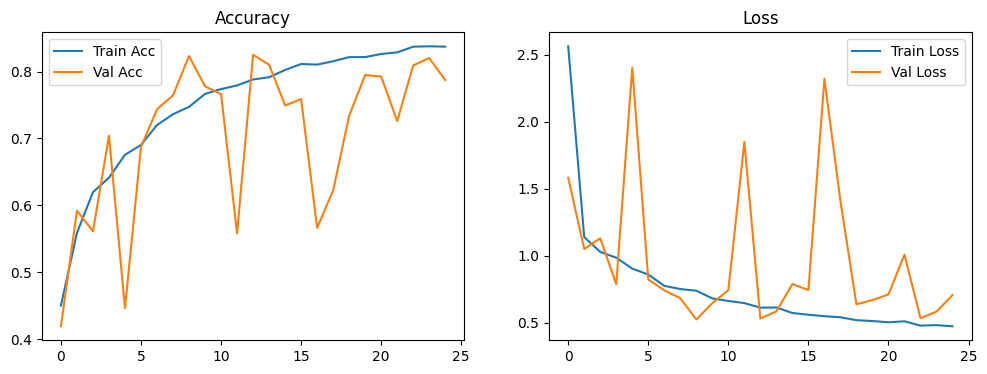

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()

### **Confusion Matrix**

94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 255ms/step


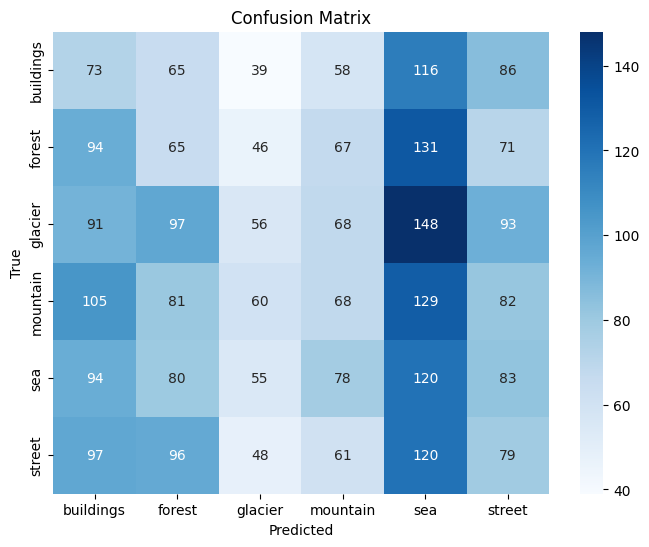

In [12]:
# Predict on test set
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### **Classification Report**

In [13]:
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

              precision    recall  f1-score   support

   buildings       0.13      0.17      0.15       437
      forest       0.13      0.14      0.14       474
     glacier       0.18      0.10      0.13       553
    mountain       0.17      0.13      0.15       525
         sea       0.16      0.24      0.19       510
      street       0.16      0.16      0.16       501

    accuracy                           0.15      3000
   macro avg       0.16      0.15      0.15      3000
weighted avg       0.16      0.15      0.15      3000



In [14]:
model.save("intel_cnn_model.h5")
# from google.colab import files
# files.download("intel_cnn_model.h5")

In [23]:
# # Run Streamlit
!streamlit run app.py

# Create a public URL
url = ngrok.connect(8501)
print(url)

^C
NgrokTunnel: "https://mellie-multicarinate-doreen.ngrok-free.dev" -> "http://localhost:8501"
